In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

## >Criação de funções para comparação de múltiplos de todos os 5 bancos com maiores valores patrimoniais:
### Bancos: Bradesco, Itaú, Brasil, Santander e BTG
### Algoritmo de Trade(extra)

In [182]:
def info_hist(stock): #Função com o começo idêntica a primeira função do trabalho porém busca somente os valores das cotações e não dos dividendos.
    x = yf.Ticker(stock) #Atribui o "bank" da função na plataforma do YAhoo finance e exporta as informações financeiras
    hist = x.history(period="4y") #Seleciona o período de 4 anos e a informação "history" da biblioteca Yahoo
    hist = hist.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits']) #Remove as colunas cujo o nome está na lista
    return hist

def div_yield(bank): 
    x = yf.Ticker(bank) #Atribui o "bank" da função na plataforma do YAhoo finance e exporta as informações financeiras
    x.history(period="4y")  #Seleciona o período de 3 anos e a informação "history" da biblioteca Yahoo
    divbank = x.dividends.reset_index() #Reseta o index da função (necessário para realizar a próxima função)
    resultado = pd.DataFrame(divbank.groupby(pd.PeriodIndex(divbank['Date'], freq="Y"))['Dividends'].sum(), columns=['Dividends']) #Utiliza a função "Agrupar por" combinada com a função "PeriodIndex" para agrupar a soma dos dividendos com a frequência anual
    return resultado

In [183]:
div_yield('BBAS3.SA')

,Dividends
Date,
2017,0.305834
2018,1.516253
2019,3.144376
2020,1.476909
2021,1.697568


In [137]:
x_df = yf.download('BBAS3.SA BBDC3.SA ITSA4.SA SANB3.SA BPAC3.SA', period='3y') #Função do yahoo fiance que nos permite fazer o download de vários tickets ao mesmo tempo com o período de 3 últimos anos e cria um dataframe com todas as informações de abertura, fechamento, etc.
x_df.head() #Mostra as 5 primeiras linhas do dataframe criado

[*********************100%***********************]  5 of 5 completed


Adj Close                                                Close  \
             BBAS3.SA   BBDC3.SA  BPAC3.SA  ITSA4.SA   SANB3.SA   BBAS3.SA   
Date                                                                         
2018-10-11  31.363590  16.803730  1.738852  9.439444  18.477278  37.200001   
2018-10-15  31.802000  16.978018       NaN  9.500909  18.092335  37.720001   
2018-10-16  33.193138  17.693197       NaN  9.896051  18.391737  39.369999   
2018-10-17  33.479778  17.699205  1.716269  9.808243  18.477278  39.709999   
2018-10-18  33.091953  17.152298  1.716269  9.509692  18.135107  39.250000   

                                                     ...       Open  \
             BBDC3.SA  BPAC3.SA ITSA4.SA   SANB3.SA  ...   BBAS3.SA   
Date                                                 ...              
2018-10-11  19.256199  1.832878    10.75  21.600000  ...  38.000000   
2018-10-15  19.455921       NaN    10.82  21.150000  ...  37.919998   
2018-10-16  20.275482       NaN    11.27  21.500000  ...  38.209999   
2018-10-17  20.282370  1.809074    11.17  21.600000  ...  38.779999   
2018-10-18  19.655647  1.809074    10.83  21.200001  ...  39.320000   

                                                         Volume             \
             BBDC3.SA  BPAC3.SA ITSA4.SA   SANB3.SA    BBAS3.SA   BBDC3.SA   
Date                                                                         
2018-10-11  19.497246  1.832878    10.88  21.750000  19067000.0  4354838.0   
2018-10-15  19.490358       NaN    10.85  21.600000  13226100.0  2040786.0   
2018-10-16  19.786501       NaN    10.92  21.600000  18196300.0  2724242.0   
2018-10-17  20.151514  1.809074    11.17  21.299999  16295800.0  3461858.0   
2018-10-18  20.220385  1.809074    11.10  21.490000  15863700.0  3652215.0   

                                          
           BPAC3.SA    ITSA4.SA SANB3.SA  
Date                                      
2018-10-11      0.0  29987000.0   6400.0  
2018-10-15      NaN  21670700.0   8000.0  
2018-10-16      NaN  26328200.0   9300.0  
2018-10-17    420.0  22111500.0  24700.0  
2018-10-18      0.0  26287200.0  15600.0  

[5 rows x 30 columns]

In [185]:
df = x_df['Adj Close'] #Atribui ao "df" somente as colunas de Adj Close
df

,BBAS3.SA,BBDC3.SA,BPAC3.SA,ITSA4.SA,SANB3.SA
Date,,,,,
2018-10-11,31.363590,16.803730,1.738852,9.439444,18.477278
2018-10-15,31.802000,16.978018,NaN,9.500909,18.092335
2018-10-16,33.193138,17.693197,NaN,9.896051,18.391737
2018-10-17,33.479778,17.699205,1.716269,9.808243,18.477278
2018-10-18,33.091953,17.152298,1.716269,9.509692,18.135107
...,...,...,...,...,...
2021-10-05,30.590000,17.969999,14.690000,11.330000,17.040001
2021-10-06,30.639999,18.040001,13.770000,11.370000,17.350000
2021-10-07,30.320000,17.660000,13.570000,11.150000,17.139999


array([<AxesSubplot:xlabel='Date', ylabel='Preço (R$)'>,
       <AxesSubplot:xlabel='Date', ylabel='Preço (R$)'>,
       <AxesSubplot:xlabel='Date', ylabel='Preço (R$)'>,
       <AxesSubplot:xlabel='Date', ylabel='Preço (R$)'>,
       <AxesSubplot:xlabel='Date', ylabel='Preço (R$)'>], dtype=object)

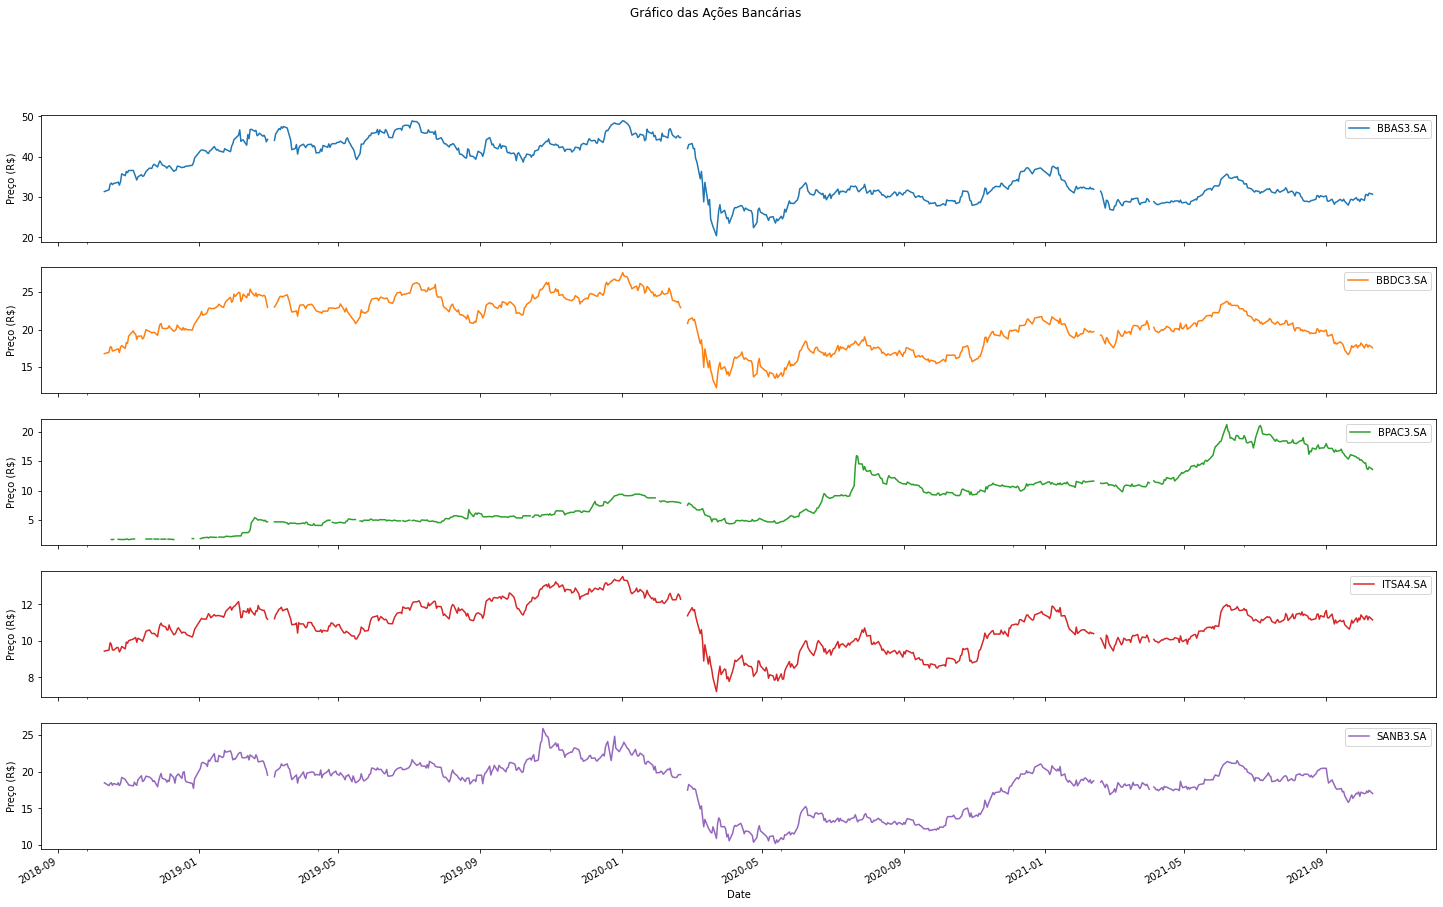

In [17]:
df.plot(figsize=(25,15), subplots = True, ylabel="Preço (R$)", title='Gráfico das Ações Bancárias') #Plota gráfico informativo do dataframe 'df' com o tamanho de 10x10.

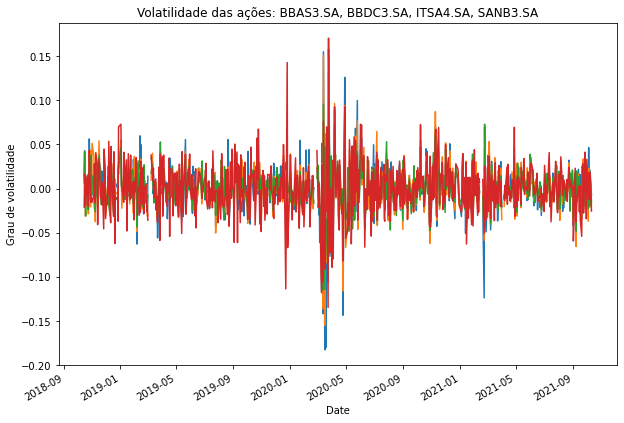

In [18]:
bank_list = ['BBAS3.SA', 'BBDC3.SA','ITSA4.SA', 'SANB3.SA'] 
for i in bank_list: ##Aplica todas as ações abaixo na lista acima
    acao = df[i]
    volatilidade = np.log(acao / acao.shift(1)) #Subtrai todas as ações pela ação do dia anterior
    volatilidade.plot(figsize = (10,7), ylabel= 'Grau de volatilidade', title='Volatilidade das ações: BBAS3.SA, BBDC3.SA, ITSA4.SA, SANB3.SA') #cria um gráfico de volatilidade com base na variância obtida na linha anterior

<AxesSubplot:>

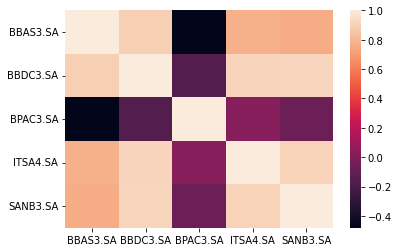

In [19]:
corr = df.corr() #Determina a correlação das ações dos bancos
sns.heatmap(corr) ##plota um gráfico de correlação do SEABORN

### Isso comprova que os bancos possuem um alto nível de correlação, exceto o BPAC.

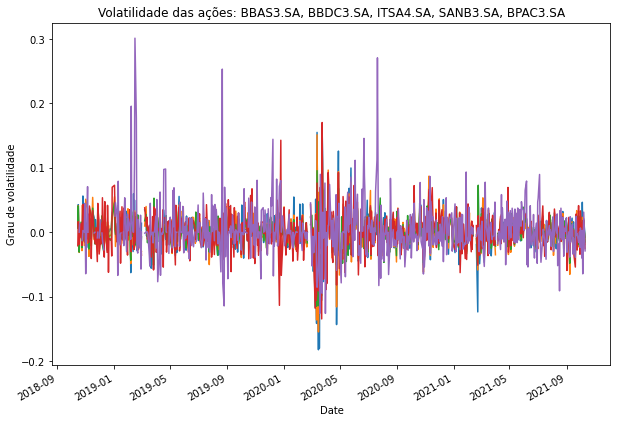

In [20]:
bank_list = ['BBAS3.SA', 'BBDC3.SA','ITSA4.SA', 'SANB3.SA', 'BPAC3.SA'] # Mesmo função do código acima porém adicionando o banco BTG Pactual
for i in bank_list:
    acao = df[i]
    volatilidade2 = np.log(acao / acao.shift(1)) 
    volatilidade2.plot(figsize = (10,7), ylabel= 'Grau de volatilidade', title='Volatilidade das ações: BBAS3.SA, BBDC3.SA, ITSA4.SA, SANB3.SA, BPAC3.SA')

### Essa alta volatilidade fora da linha do banco BTG Pactual é explicada pelo seu rápido reconhecimento como maior banco de investimentos da america latina, seu lucro de 1,258 bi no primeiro semestre de 2020, 3.833 bi em 2019, e dobrou a captação de dinheiro para ser investido em 2020. Todas essas notícias e divulgações de resultados contribuem para o crescimento das ações da empresa.

<AxesSubplot:title={'center':'Gráfico comparativo dos dividendos dos 5 Bancos'}, xlabel='Date', ylabel='Dividendos (R$)'>

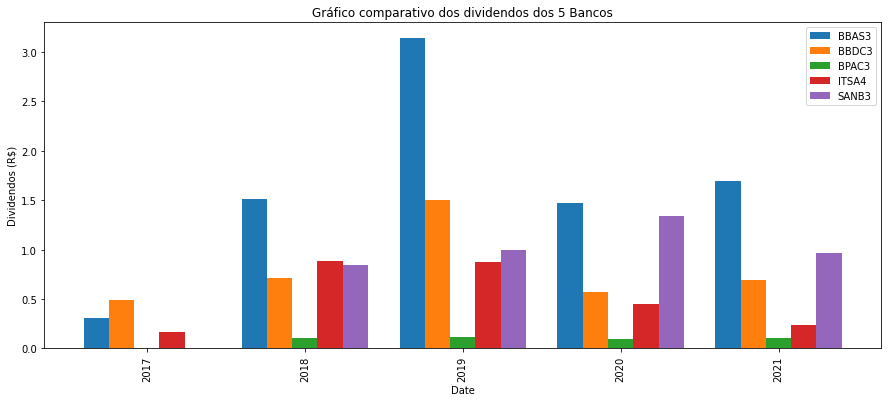

In [186]:
# Os códigos abaixo obtém os pagamentos de dividendos utilizando a primeira função formada e renomeia a coluna de "Dividends" para o nome da Ação
info = div_yield('BBAS3.SA')
info_1 = info.rename(columns={'Dividends' : 'BBAS3'})
info2 = div_yield('BBDC3.SA')
info_2 = info2.rename(columns={'Dividends' : 'BBDC3'})
info3 = div_yield('BPAC3.SA')
info_3 = info3.rename(columns={'Dividends' : 'BPAC3'})
info4 = div_yield('ITSA4.SA')
info_4 = info4.rename(columns={'Dividends' : 'ITSA4'})
info5 = div_yield('SANB3.SA')
info_5 = info5.rename(columns={'Dividends' : 'SANB3'})
# Os códigos abaixo utiliza a função pd.merge para juntar todos os dataframes obtidos acima com base na coluna "Date"
dividendos = pd.merge(info_1, info_2, how='left', on='Date')
dividendos = pd.merge(dividendos, info_3, how='left', on='Date')
dividendos = pd.merge(dividendos, info_4, how='left', on='Date')
dividendos = pd.merge(dividendos, info_5, how='left', on='Date')
dividendos.plot.bar(figsize=(15,6),subplots=False, title= 'Gráfico comparativo dos dividendos dos 5 Bancos', ylabel='Dividendos (R$)',width=0.8)


In [196]:
def fluxo_horizontal(azul):  #Função que permite a análise horizontal do fluxo de caixa da companhia, comparando resultados de anos diferentes.
    azulinfo = yf.Ticker(azul) #Atribui o "azul" da função na plataforma do YAhoo finance e exporta as informações financeiras
    azulinfo.history(period='6y') #Determina o período de 6 anos 
    azul1 = azulinfo.get_cashflow() #Função do Yahoo finance que busca as informações de fluxo de caixa e transforma em dataframe
    azul1 = azul1.T #Transpõe o dataframe obtido acima
    azul1 = azul1.pct_change() #Calcula a variação em Porcentagem 
    azul1 = azul1.drop('2020-12-31') #Remove a linha de 2020  
    return azul1

def fluxo_vertical(azul):   #Função que permite a análise vertical do fluxo de caixa, determinando melhor as porcentagens de cada receita e despesa sobre o total.
    azulinfo = yf.Ticker(azul) #Atribui o "azul" da função na plataforma do YAhoo finance e exporta as informações financeiras
    azulinfo.history(period='6y') #Determina o período de 6 anos 
    azul1 = azulinfo.get_cashflow() #Função do Yahoo finance que busca as informações de fluxo de caixa e transforma em dataframe
    azul1.loc['Total']= azul1.sum(numeric_only=True, axis=0) #Cria uma linha com o Total para poder dividir cada um sobre o total no futuro
    total = azul1.iloc[-1] #Atribui o 'total' como o total de cada coluna
    azul1 = (azul1/total)*100 # Modifica o dataframe dividindo todos os valores sobre o total: encontrando a porcentagem de cada fluxo de caixa sobre o total
    return azul1

In [197]:
fluxo_vertical('AZUL4.SA')

,2020-12-31,2019-12-31,2018-12-31,2017-12-31
Investments,0.991130,22.377020,49.986860,-102.134389
Change To Liabilities,26.948629,36.290318,67.165758,39.488871
Total Cashflows From Investing Activities,-9.559374,-72.711255,-25.161994,-175.746500
Net Borrowings,21.534744,-57.492693,-109.044006,-152.837536
Total Cash From Financing Activities,22.097583,-55.966321,-105.786208,39.566556
Change To Operating Activities,9.043736,-4.520422,-67.804637,-26.401866
Issuance Of Stock,0.562840,2.313818,4.376870,200.107589
Net Income,-256.474929,-147.226536,-58.414407,68.992288
Change In Cash,33.541123,29.330545,37.380549,34.642169
Effect Of Exchange Rate,-2.106015,-0.953906,6.159906,5.986137


In [198]:
fluxo_horizontal('BBAS3.SA')

,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Net Borrowings,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Effect Of Exchange Rate,Total Cash From Operating Activities,Depreciation,Other Cashflows From Investing Activities,Dividends Paid,Other Cashflows From Financing Activities,Change To Netincome,Capital Expenditures
,,,,,,,,,,,,,,,,,
2019-12-31,-0.710213,NaN,-0.684897,-0.430364,-0.810288,-1.103712,182.741420,0.430379,-0.888727,-1.015385,-0.743235,0.099022,-0.349736,0.019847,-0.739317,-0.180016,-0.028538
2018-12-31,-0.577347,inf,-0.648483,-0.574773,0.396869,9.128930,-0.994078,-0.291819,0.133694,-16.885770,-1.245222,0.040119,0.985833,-0.303979,0.107206,-0.164416,-0.175797
2017-12-31,0.333944,2.080322,0.366613,-1.555290,-0.868093,0.969646,-0.716711,-0.143931,-5.253485,-0.985670,7.083923,0.411213,0.100697,0.537564,-0.869917,0.250908,-0.250397


In [581]:
def info_hist(stock): #Função com o começo idêntica a primeira função do trabalho porém busca somente os valores das cotações e não dos dividendos.
    x = yf.Ticker(stock) 
    hist = x.history(period="4y") 
    hist = hist.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits']) #Remove as colunas cujo o nome está na lista
    return hist
database = info_hist('AZUL4.SA')
database

,Close
Date,
2017-10-11,29.850000
2017-10-12,29.850000
2017-10-13,29.200001
2017-10-16,28.709999
2017-10-17,28.450001
...,...
2021-10-05,36.250000
2021-10-06,35.669998
2021-10-07,35.360001


In [630]:
def info_hist(stock): #Função com o começo idêntica a primeira função do trabalho porém busca somente os valores das cotações e não dos dividendos.
    x = yf.Ticker(stock) 
    hist = x.history(period="4y") 
    hist = hist.drop(columns=['Open','High','Low','Volume','Dividends','Stock Splits']) #Remove as colunas cujo o nome está na lista
    return hist
database = info_hist('BPAC3.SA')

database['mmp'] = database['Close'].rolling(window= 20).mean() #Determina a media movel ponderada com 20 períodos (utiliza a janela dos ultimos 20 valores e calcula a média deles)
database['up_bollinger'] = database['mmp'] + 2*database['Close'].rolling(window = 20).std() #Calcula a borda superior de Bollinger utilizando o valor obtido no "database['mmp']" somado duas vezes o valor obtido na  janela da variação dos ultimos 20 valores multiplicados por 2 
database['low_bollinger'] = database['mmp'] - 2*database['Close'].rolling(window = 20).std() #Idêntica à formula acima, porém subtraindo 

database.tail()

,Close,mmp,up_bollinger,low_bollinger
Date,,,,
2021-10-05,14.69,15.9045,17.296212,14.512788
2021-10-06,13.77,15.7680,17.424179,14.111821
2021-10-07,13.57,15.6015,17.438216,13.764783
2021-10-08,14.00,15.4695,17.370308,13.568691
2021-10-11,13.60,15.3095,17.276325,13.342675


<AxesSubplot:title={'center':'Bandas de Bollinger'}, xlabel='Data', ylabel='Preço'>

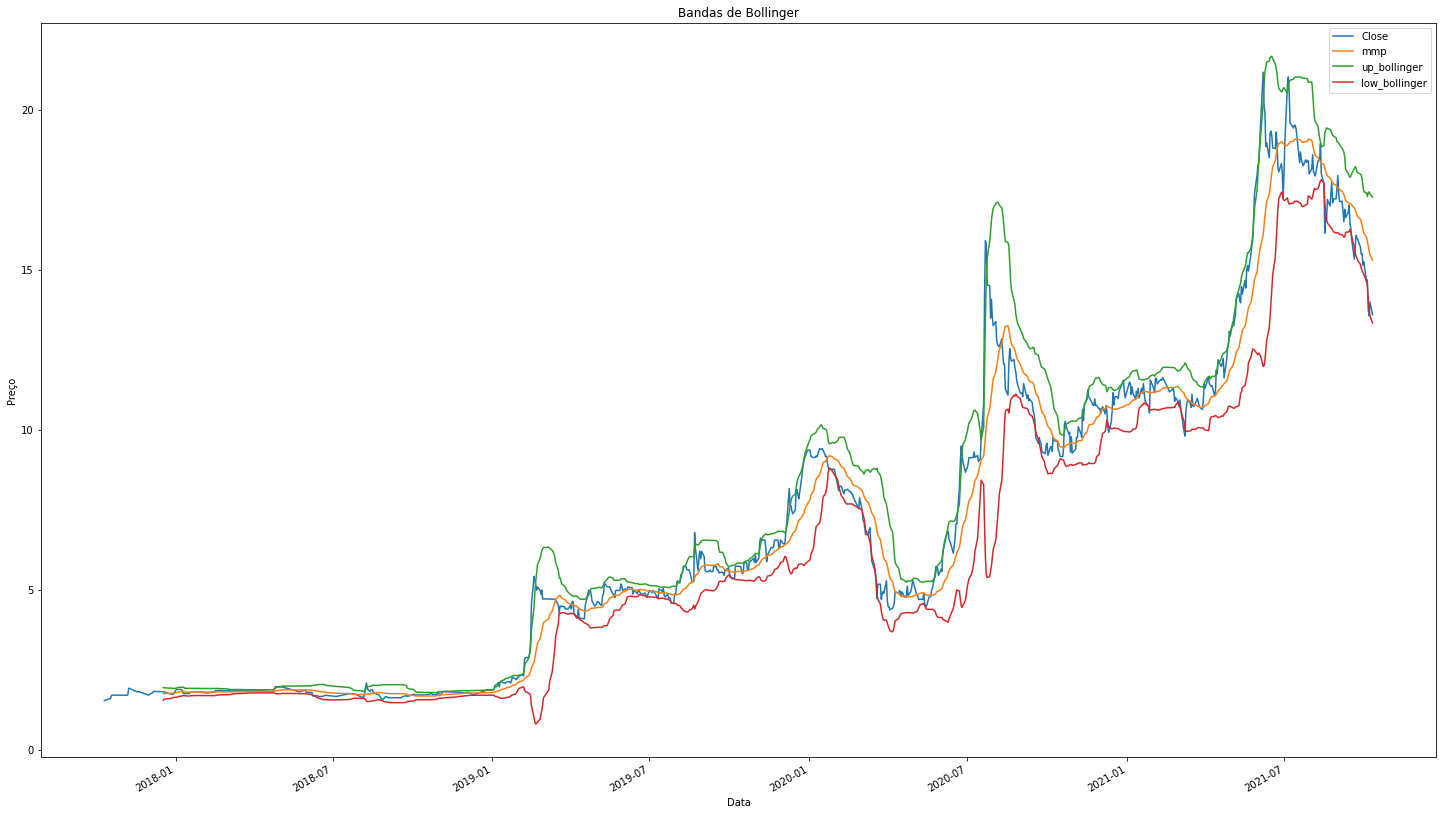

In [631]:
database.plot(figsize=(25,15), title='Bandas de Bollinger', ylabel='Preço', xlabel ='Data', legend=('Preço da Ação', 'Média Móvel Ponderada', 'Banda Superior', 'Banda Inferior')) #Plota um gráfico atribuindo título, nome da coluna X e Y e dimensões de 25x15

## As bandas de bollinger são utilizadas como indicadores de investimento para day traders, o seu conceito é determinar opções de compra e venda com base em análise gráfica.

In [627]:
def indicacao(empresa): #Essa função terá como o objetivo de plotar dois gráficos: um de indicações de compras históricas e um de indicações de vendas
    database = info_hist(empresa)
    database['mmp'] = database['Close'].rolling(window= 20).mean() #Determina a media movel ponderada com 20 períodos (utiliza a janela dos ultimos 20 valores e calcula a média deles)
    database['up_bollinger'] = database['mmp'] + 2*database['Close'].rolling(window = 20).std() #Calcula a borda superior de Bollinger utilizando o valor obtido no "database['mmp']" somado duas vezes o valor obtido na  janela da variação dos ultimos 20 valores multiplicados por 2 
    database['low_bollinger'] = database['mmp'] - 2*database['Close'].rolling(window = 20).std() #Idêntica à formula acima, porém subtraindo 
    database['Indicação'] = np.where(database['Close'] < database['low_bollinger'],'g','None') #Criei uma nova coluna chamada "indicação" e atribui a ela o valor "g" todas as vezes que o fechamento ser menor que a banda inferior
    database = database.reset_index() #Reseta o index
    plt.scatter(x=database['Date'], y= database["Close"], c = database["Indicação"]) #Cria um gráfico atribuindo a DATA no X, fechamento no Y e a cor a coluna da "Indicação"
    fig = plt.gcf() #Essa e a próxima linha alteram o tamanho do gráfico
    fig.set_size_inches(15, 10)
    plt.title("Recomendações de Compra") #Atribui um título ao gráfico
    x = plt.show() #Mostra o gráfico
    database['Indicação'] = np.where(database['Close'] > database['up_bollinger'],'r','None') #Na mesma coluna chamada "indicação" atribui a ela o valor "r" todas as vezes que o fechamento foi maior que a banda superior
    database = database.reset_index() #Reseta o index
    plt.scatter(x=database['Date'], y= database["Close"], c = database["Indicação"]) #Cria um gráfico atribuindo a DATA no X, fechamento no Y e a cor a coluna da "Indicação"
    fig = plt.gcf()#Essa e a próxima linha alteram o tamanho do gráfico
    fig.set_size_inches(15, 10)
    plt.title("Recomendações de Venda") #Atribui um título ao gráfico
    y = plt.show() #Mostra o gráfico
    return x, y


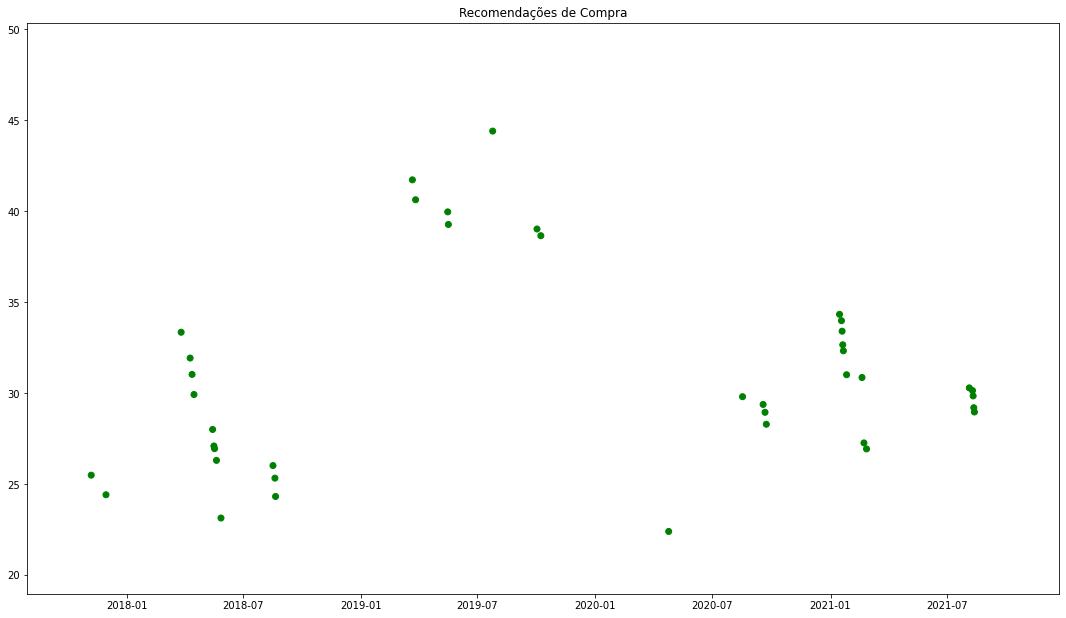

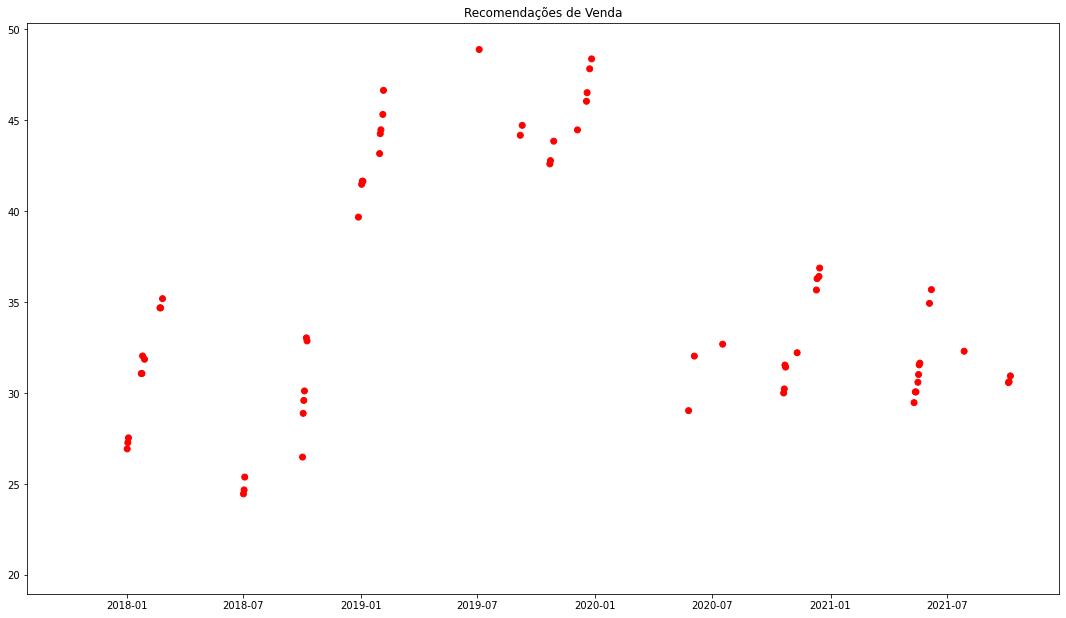

,index,Date,Close,mmp,up_bollinger,low_bollinger,Indicação
810,810,2021-10-05,14.69,15.9045,17.296212,14.512788,None
811,811,2021-10-06,13.77,15.7680,17.424179,14.111821,None
812,812,2021-10-07,13.57,15.6015,17.438216,13.764783,None
813,813,2021-10-08,14.00,15.4695,17.370308,13.568691,None
814,814,2021-10-11,13.60,15.3095,17.276325,13.342675,None


In [628]:
indicacao('BBAS3.SA') 
pd.DataFrame(database.tail()) #mostra os ultimos valores do indicador de Bollinger e as indicações

### Podemos observar que não houveram indicações nos últimos 5 dias. Isso ocorreu pela baixa volatilidade nesses períodos. Em épocas de crise (1T de 2020) podemos ver o algoritmo ensinunando muita venda na ultima alta e compras nas baixas.
